# Perceptrón
![Frank Rosenblatt](images/0925_rosenblatt_main.jpg)
Frank Rosenblatt fue el inventor del perceptrón, considerado como el primer sistema capaz de tener una idea original.

- Es un algoritmo de aprendizaje supervisado para clasificación binaria de tipo linear ya que hace sus predicciones con base en una función lineal de predicción que combina un conjunto de pesos con un vector de características.
- Inventado en 1958 en Cornell Aeronautical Laboratory por Frank Rosenblatt.

## Elementos
- _m_ entradas binarias (-1  o 1) y una salida binaria (-1 o 1).
- _m_ pesos de conexión wij
- Umbral mu

![Perceptrón](images/perceptron-arch.png "Perceptrón")

En el caso de un perceptrón de una sola capa la suma ponderada representa un hiperplano lineal. Todo en un lado del hiperplano es clase 1 (salida = +1) y todo en el otro lado es clase 2 (salida = -1).

El perceptón puede calcular cualquier función que sea linealmente separable.

La función AND es linealmente separable.

|u1|u2|AND|
|-|-|-|
|-1|-1| -1|
|1|-1| -1|
|-1|1| -1|
|1|1| 1|

(Las funciones OR y NOT también son linealmente separables).

¿Puede un perceptrón separar las salidas +1 de las salidas -1?

![Perceptrón](images/perceptron1.png)


## Definiciones
- r es la tasa de aprendizaje del perceptrón, con rango entre 0 y 1. Mientras mayor sea el valor, el cambio en los pesos será mayor.
- $y = f(z)$ denota la salida del perceptrón de un vector de entrada $z$.
- $D = {(x_1, d_1),..., (x_m, d_m) }$ es el conjunto de entrenamiento con $s$ ejemplos donde:
    -$xj$ es el vector de entrada de n-dimensiones
    
    -$dj$ es el valor deseado de la salida del perceptrón para dicha unidad.

## Proceso
- Inicializar los pesos y el umbral. Los pesos pueden ser inicializados en 0 o un pequeño valor aleatorio.
- Por cada instancia del conjunto de datos de entrenamiento $D$, realizar los siguientes pasos sobre la entrada $x_j$ y la salida deseada $d_j$:
    - Calcular la salida real
    $y_i(t) = f[w(t)*x_j]$
    
    - Actualizar los pesos
    $w_i(t+1) = w_i(t) + r * (d_j - y_j(t))x_{j,i})$ para todas las características $0<=i<=n$, donde $r$ es la tasa de entrenamiento.
    - Para entrenamiento fuera de línea, el segundo paso puede repetirse hasta que el error de la iteración $1/s\sum_{j=1}^s |d_j - y_j(t)|$sea menor que un umbral $\gamma$ definido por el usuario, o un número predefinido de interaciones se haya completado, donde $s$ es el tamaño del la colección de muestras.

# Demostración del algoritmo del Perceptrón
El algoritmo lineal del perceptrón puede ser empleado para clasificar puntos de datos de acuerdo con características inherentes a ellos. La idea es encontrar una curva (o hiperplano) que separe los puntos de con distintas características. Con la curva es posible decidir si otros puntos son característica de A o de B de acuerdo a la posición que tengan con respecto a la curva (arriba o abajo de ella).

En esta demostración se generará una colección de $N$ puntos $(x_0, x_1)$. Si los puntos se encuentran arriba de la línea se graficarán con color azul, si los puntos están por debajo de la línea, entonces se representarán con color verde.

En este modelo los puntos azules, estarán asociados con el valor $-1$, mientras que los puntos verdes estarán asociados con el valor $1$.

Importamos las librerías requeridas para esta demostración.

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# Basado en el tutorial de Kostis Gourgoulias (http://kgourgou.me/)

#Especificar el tamaño de la gráfica
pl.rcParams['figure.figsize'] = (12.0, 10.0)

En esta sección determinamos la clase de cada instancia, la cual se encuentra representada por el arreglo `yn`.

Nótese la función `f = lambda x : a*x + b`

¿A qué corresponden los valores de b y a?

Text(0.5,1,'Selected points with their separating line.')

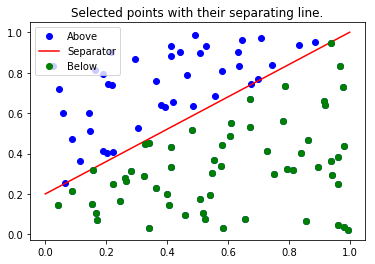

In [2]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1)

# Pick a line 
#a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:,0],xn[:,1],'bo')
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1])

for i in xrange(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
#figa.axes.get_xaxis().set_visible(False)
#figa.axes.get_yaxis().set_visible(False)

In [3]:
print("x",x)
print(len(x))
print("xn",xn[0:6])
print("yn",yn[0:6])
print(xrange(N))

('x', array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]))
50
('xn', array([[0.54900303, 0.3042869 ],
       [0.41434103, 0.43137544],
       [0.91840985, 0.64142039],
       [0.94165105, 0.29257715],
       [0.49292113, 0.98774998],
       [0.96022902, 0.24775203]]))
('yn', array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.]]))
xrange(100)


La curva naturalmente separa el espacio en dos regiones, una para los puntos verdes y la otra para los puntos azules. Es posible determinar el color de cualquier otro punto de acuerdo a la posición que ocupe con respecto a esta curva.

El reto consiste en determinar la curva de acuerdo a estos puntos, considerando que la distribución de los puntos permita separarlos linealmente. 

In [5]:
def perceptron(xn, yn, max_iter=1000, w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {-1,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            max_iter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
'''
    
    N = xn.shape[0]
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in xrange(max_iter):
        i = nr.randint(N) # try a random sample from the dataset
        print i, xn[i,0], xn[i,1], f(xn[i,:]), yn[i]
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
            w[0] = w[0] + yn[i] # the first weight is effectively the bias
            w[1] = w[1] + yn[i] * xn[i,0]
            w[2] = w[2] + yn[i] * xn[i,1]
            
                
                
            
    return w

w = perceptron(xn, yn, max_iter=5)



53 0.507727453317016 0.899197904418962 0.0 [-1.]
40 0.21772730562294929 0.7398740356941358 -1.0 [-1.]
88 0.7454166805966386 0.84036955045513 -1.0 [-1.]
41 0.1675213545018568 0.10574007703823007 -1.0 [1.]
50 0.6999473274812421 0.7692750622514669 -1.0 [-1.]


In [6]:
print(w)
#

[ 0.         -0.3402061  -0.79345783]


Invocaremos al perceptrón para obtener los pesos del modelo. Con los pesos se determinara la linea que fue estimada como divisora de las instancias.

Bias representa la intercepción añadida a una ecuación lineal. Representa un parámetro  que se emplea para ajustar la salida junto con la suma ponderada de las entradas. El bias funge como una constante que ayuda al ajuste del modelo a los datos.

Otra forma de entender el bias es como una constante de una función lineal
`y = mx + c`

Dicho de otra forma, el bias permite mover la linea arriba o abajo permitiendo que la predicción de los datos sea mejor.

86 0.025658591846183798 0.8315790307258956 -1.0 [-1.]
64 0.3651069059764416 0.7595194485569924 -1.0 [-1.]
38 0.2820524854155577 0.31297338773186456 -1.0 [1.]
1 0.4143410329183471 0.4313754388208225 1.0 [1.]
31 0.9824602686370842 0.4391797575856444 1.0 [1.]
31 0.9824602686370842 0.4391797575856444 1.0 [1.]
47 0.0636287746268045 0.2531140167281535 1.0 [-1.]
3 0.9416510471109741 0.2925771502915103 -1.0 [1.]
56 0.812290303314515 0.32014719233745703 1.0 [1.]
59 0.6724929498459986 0.6695114475644266 1.0 [1.]
35 0.9384210640646427 0.9458404533279374 1.0 [1.]
62 0.34195090105290904 0.03365509485465168 1.0 [1.]
55 0.605743965035747 0.4879221357027501 1.0 [1.]
47 0.0636287746268045 0.2531140167281535 1.0 [-1.]
88 0.7454166805966386 0.84036955045513 -1.0 [-1.]
6 0.9384392061850527 0.36078942458808894 1.0 [1.]
15 0.4417235030049721 0.90180633300683 -1.0 [-1.]
24 0.39930034348048327 0.20078716166553545 1.0 [1.]
43 0.579400897447684 0.43985237357942863 1.0 [1.]
51 0.7092119201319346 0.97218260534980

96 0.675305580666472 0.7444714900888579 -1.0 [-1.]
64 0.3651069059764416 0.7595194485569924 -1.0 [-1.]
10 0.2648841475911995 0.263689580939906 1.0 [1.]
51 0.7092119201319346 0.9721826053498078 -1.0 [-1.]
10 0.2648841475911995 0.263689580939906 1.0 [1.]
11 0.3625464935470567 0.2317483499783045 1.0 [1.]
36 0.9603634526035628 0.047498048195531495 1.0 [1.]
76 0.728620024203575 0.4120499082317187 1.0 [1.]
59 0.6724929498459986 0.6695114475644266 1.0 [1.]
99 0.8845581530397566 0.952331384564431 -1.0 [-1.]
33 0.6576287571640677 0.07642800891790513 1.0 [1.]
91 0.857520526082347 0.06676719378654128 1.0 [1.]
46 0.29567196173777543 0.8675577937701018 -1.0 [-1.]
30 0.6356215744631872 0.833465526556549 -1.0 [-1.]
4 0.49292112732748283 0.9877499825472958 -1.0 [-1.]
83 0.15736962023769374 0.31857395139778777 1.0 [1.]
34 0.5073470755413857 0.17390691762048338 1.0 [1.]
34 0.5073470755413857 0.17390691762048338 1.0 [1.]
46 0.29567196173777543 0.8675577937701018 -1.0 [-1.]
1 0.4143410329183471 0.43137543

48 0.14789656851933108 0.5114605317465495 -1.0 [-1.]
35 0.9384210640646427 0.9458404533279374 1.0 [1.]
7 0.15201524082615436 0.1503130910294801 1.0 [1.]
24 0.39930034348048327 0.20078716166553545 1.0 [1.]
94 0.5557062993837324 0.3664426360679266 1.0 [1.]
11 0.3625464935470567 0.2317483499783045 1.0 [1.]
40 0.21772730562294929 0.7398740356941358 -1.0 [-1.]
34 0.5073470755413857 0.17390691762048338 1.0 [1.]
48 0.14789656851933108 0.5114605317465495 -1.0 [-1.]
9 0.1441384553357975 0.6020031604797311 -1.0 [-1.]
23 0.3291639958411363 0.4489104699030777 1.0 [1.]
20 0.5786735647146579 0.3359936211855332 1.0 [1.]
82 0.19047165940603683 0.795729283447797 -1.0 [-1.]
18 0.5168972538714852 0.1076265744882493 1.0 [1.]
79 0.9816209991648188 0.03869649917461215 1.0 [1.]
54 0.20758733866594858 0.7447587302848854 -1.0 [-1.]
42 0.5583770951246135 0.6832428853875759 1.0 [-1.]
93 0.1639209388816919 0.8135863537576172 -1.0 [-1.]
34 0.5073470755413857 0.17390691762048338 1.0 [1.]
69 0.411767357748806 0.9326

57 0.8628409710693655 0.4669059580574727 1.0 [1.]
78 0.22367011470681364 0.4084998196484849 1.0 [-1.]
68 0.41239838952985275 0.8824282550794824 -1.0 [-1.]
60 0.9152039686734017 0.6604264063268147 1.0 [1.]
14 0.2025562852510875 0.4016375879402263 -1.0 [-1.]
15 0.4417235030049721 0.90180633300683 -1.0 [-1.]
83 0.15736962023769374 0.31857395139778777 -1.0 [1.]
93 0.1639209388816919 0.8135863537576172 -1.0 [-1.]
47 0.0636287746268045 0.2531140167281535 1.0 [-1.]
60 0.9152039686734017 0.6604264063268147 1.0 [1.]
76 0.728620024203575 0.4120499082317187 1.0 [1.]
5 0.9602290220813392 0.24775203185462624 1.0 [1.]
32 0.6465708195789128 0.9621404518330693 -1.0 [-1.]
13 0.8414976435292705 0.40099244518086263 1.0 [1.]
85 0.9629131873764797 0.3831714416246266 1.0 [1.]
83 0.15736962023769374 0.31857395139778777 -1.0 [1.]
71 0.7797031642132926 0.5601002523410599 1.0 [1.]
41 0.1675213545018568 0.10574007703823007 1.0 [1.]
59 0.6724929498459986 0.6695114475644266 1.0 [1.]
54 0.20758733866594858 0.744758

Text(0.5,1,'Comparison between the linear separator and the perceptron approximation.')

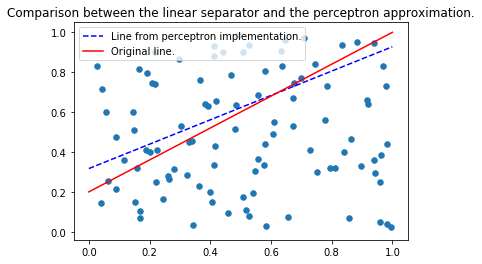

In [7]:
w = perceptron(xn, yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

#pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.scatter(xn[:,0],xn[:,1], s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')